<a href="https://colab.research.google.com/github/zahraniayudyaa/TUGAS-ML/blob/main/ch_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Linear SVM Classification**
---
Mencari decision boundary dengan margin terbesar antara dua kelas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Create and train Linear SVM
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

svm_clf.fit(X, y)

print("Model trained!")
print("Predicting for [5.5, 1.7]:", svm_clf.predict([[5.5, 1.7]]))

Model trained!
Predicting for [5.5, 1.7]: [1.]


# **3. Visualisasi Decision Boundary**
---

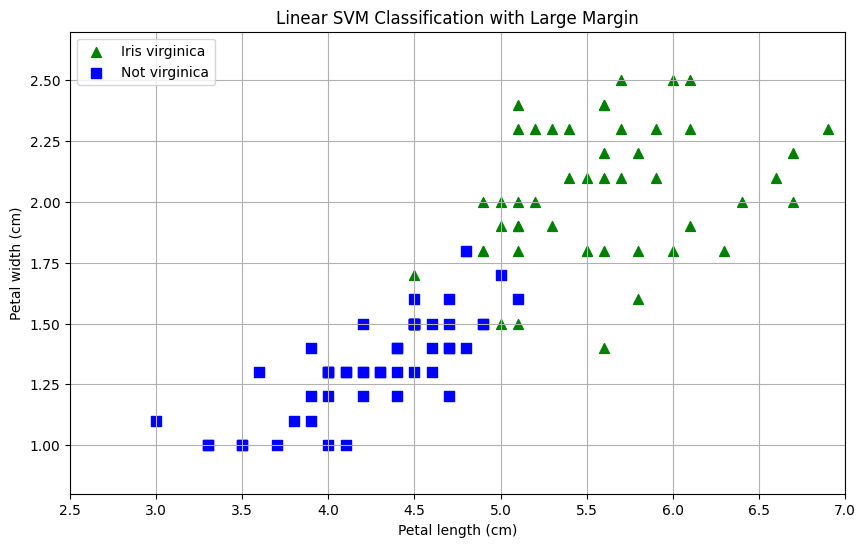

In [2]:
def plot_svc_decision_boundary(clf, xmin, xmax):
    w = clf.named_steps["linear_svc"].coef_[0]
    b = clf.named_steps["linear_svc"].intercept_[0]

    # Decision boundary: w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=1)
    plt.plot(x0, gutter_down, "k--", linewidth=1)

# Plotting
plt.figure(figsize=(10, 6))
# Plot training data
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s=50, c="g", marker="^", label="Iris virginica")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=50, c="b", marker="s", label="Not virginica")
plot_svc_decision_boundary(svm_clf, 2.5, 7)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Linear SVM Classification with Large Margin")
plt.legend(loc="upper left")
plt.grid(True)
plt.axis([2.5, 7, 0.8, 2.7])
plt.show()

# **4. Pengaruh Hyperparameter C**
---
C mengontrol trade-off antara margin besar dan margin violations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


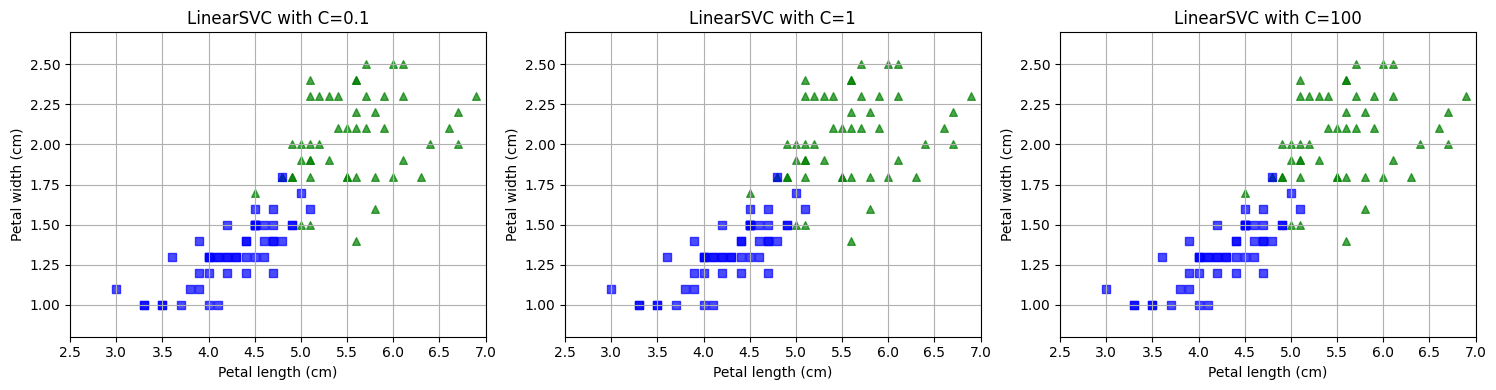

In [3]:
# Train with different C values
C_values = [0.1, 1, 100]
plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=C, loss="hinge", random_state=42))
    ])
    svm_clf.fit(X, y)

    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s=30, c="g", marker="^", alpha=0.7)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=30, c="b", marker="s", alpha=0.7)

    # Decision boundary
    w = svm_clf.named_steps["linear_svc"].coef_[0]
    b = svm_clf.named_steps["linear_svc"].intercept_[0]
    x0 = np.linspace(2.5, 7, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=1, alpha=0.5)
    plt.plot(x0, gutter_down, "k--", linewidth=1, alpha=0.5)

    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title(f"LinearSVC with C={C}")
    plt.grid(True)
    plt.axis([2.5, 7, 0.8, 2.7])

plt.tight_layout()
plt.show()

# **5. Nonlinear SVM dengan Polynomial Features**
---
Untuk data nonlinear, tambahkan polynomial features.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


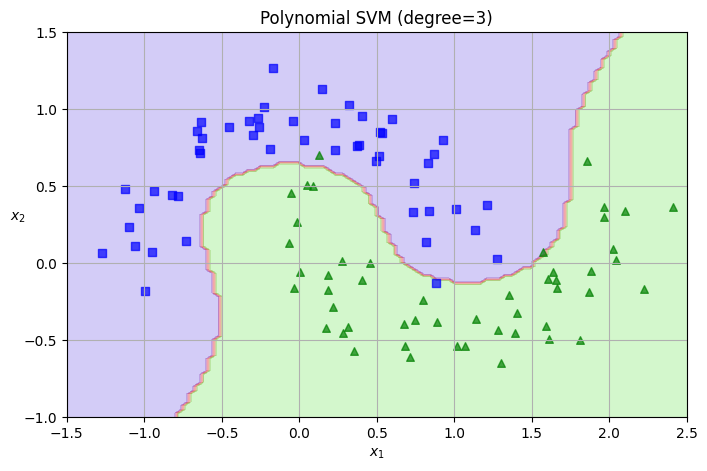

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial SVM
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

poly_svm_clf.fit(X_moons, y_moons)

# Plot decision boundary
def plot_dataset(X, y, axes):
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=30, c="b", marker="s", alpha=0.7)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s=30, c="g", marker="^", alpha=0.7)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.axis(axes)
    plt.grid(True)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(8, 5))
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Polynomial SVM (degree=3)")
plt.show()

# **6. Polynomial Kernel dengan SVC**
---
Menggunakan kernel trick tanpa perlu menambahkan features secara eksplisit.

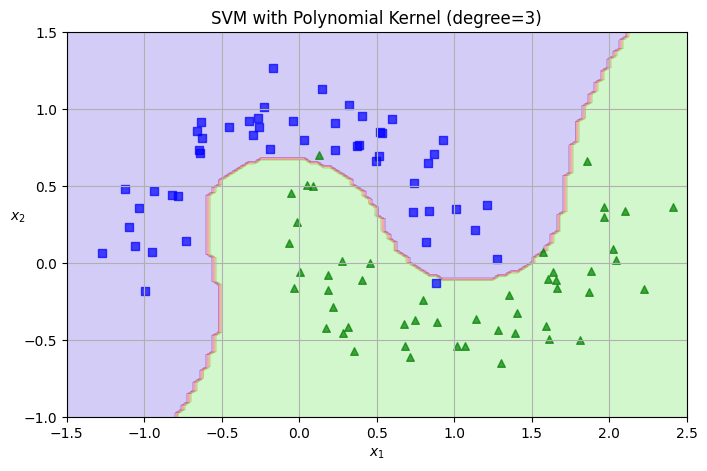

In [5]:
from sklearn.svm import SVC

# Polynomial kernel SVM
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42))
])

poly_kernel_svm_clf.fit(X_moons, y_moons)

plt.figure(figsize=(8, 5))
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.show()

# **7. RBF Kernel (Gaussian Kernel)**
---
Kernel yang paling umum digunakan untuk SVM nonlinear.

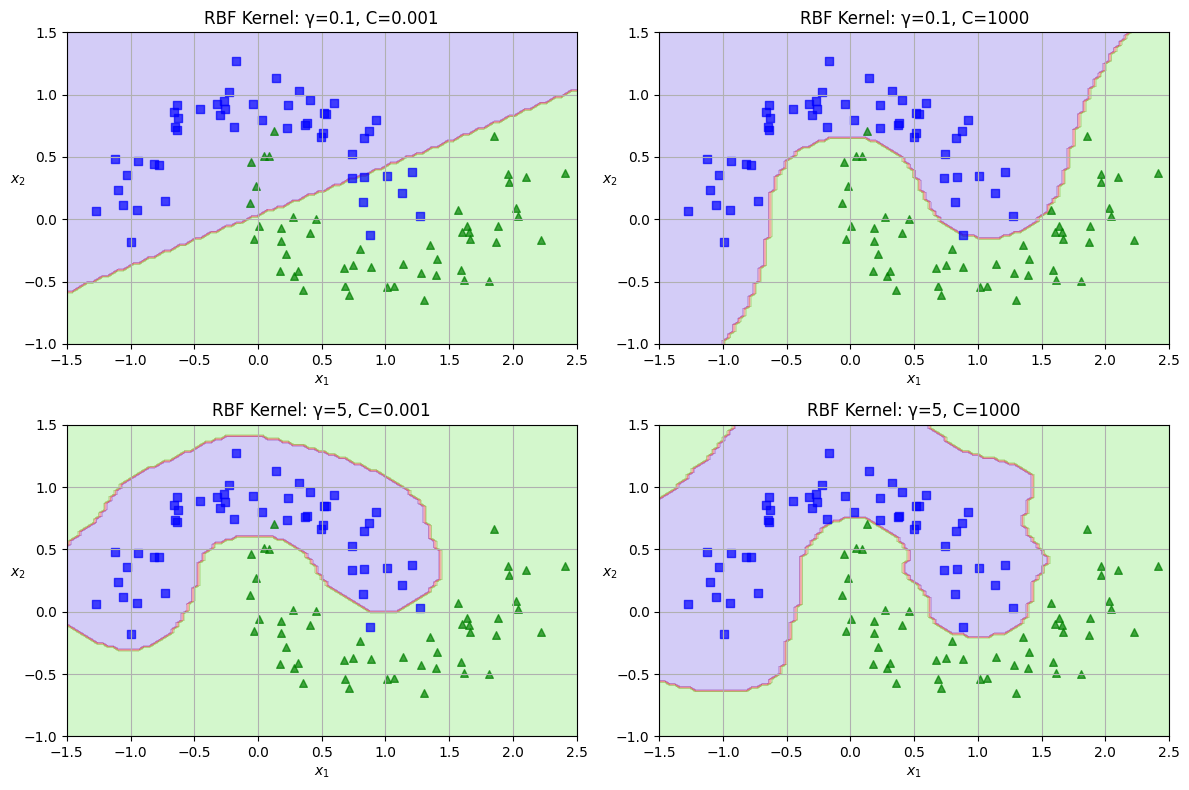

In [6]:
  # RBF kernel with different gamma and C values
gamma_values = [0.1, 5]
C_values = [0.001, 1000]

plt.figure(figsize=(12, 8))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C, random_state=42))
        ])
        rbf_kernel_svm_clf.fit(X_moons, y_moons)

        plt.subplot(2, 2, i*2 + j + 1)
        plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
        plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
        plt.title(f"RBF Kernel: γ={gamma}, C={C}")

plt.tight_layout()
plt.show()

# **8. SVM Regression**
---
SVM juga dapat digunakan untuk regresi.

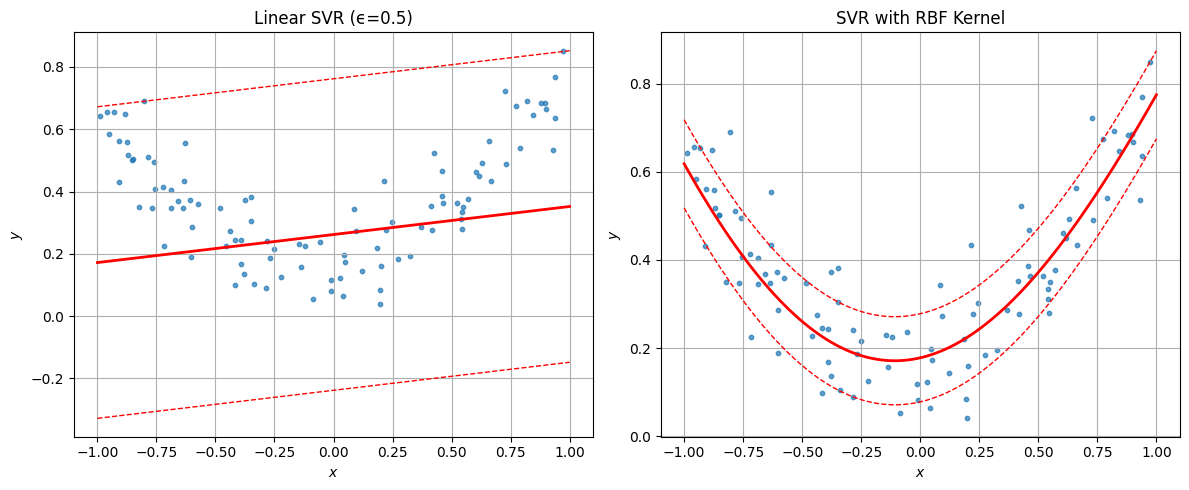

In [7]:
from sklearn.svm import LinearSVR, SVR
from sklearn.preprocessing import StandardScaler

# Generate linear data with noise
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# Linear SVM Regression
svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X, y)

# Nonlinear SVM Regression with RBF kernel
svm_rbf_reg = SVR(kernel="rbf", gamma=0.1, C=100, epsilon=0.1)
svm_rbf_reg.fit(X, y)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear SVR
axes[0].scatter(X, y, s=10, alpha=0.7)
X_new = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = svm_reg.predict(X_new)
axes[0].plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
axes[0].plot(X_new, y_pred + svm_reg.epsilon, "r--", linewidth=1)
axes[0].plot(X_new, y_pred - svm_reg.epsilon, "r--", linewidth=1)
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$y$")
axes[0].set_title("Linear SVR (ϵ=0.5)")
axes[0].grid(True)

# SVR with RBF kernel
axes[1].scatter(X, y, s=10, alpha=0.7)
y_pred_rbf = svm_rbf_reg.predict(X_new)
axes[1].plot(X_new, y_pred_rbf, "r-", linewidth=2, label="Predictions")
axes[1].plot(X_new, y_pred_rbf + svm_rbf_reg.epsilon, "r--", linewidth=1)
axes[1].plot(X_new, y_pred_rbf - svm_rbf_reg.epsilon, "r--", linewidth=1)
axes[1].set_xlabel("$x$")
axes[1].set_ylabel("$y$")
axes[1].set_title("SVR with RBF Kernel")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **9. Perbandingan SVM Implementasi di Scikit-Learn**
---

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
import time

# Generate synthetic data
from sklearn.datasets import make_classification
X_syn, y_syn = make_classification(n_samples=1000, n_features=20, random_state=42)

# Scale the data
scaler = StandardScaler()
X_syn_scaled = scaler.fit_transform(X_syn)

# Compare training time
classifiers = {
    "LinearSVC": LinearSVC(random_state=42),
    "SVC (linear)": SVC(kernel="linear", random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42)
}

for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_syn_scaled, y_syn)
    end_time = time.time()
    score = clf.score(X_syn_scaled, y_syn)
    print(f"{name}:")
    print(f"  Training time: {end_time - start_time:.4f} seconds")
    print(f"  Accuracy: {score:.4f}")
    print()

LinearSVC:
  Training time: 0.0081 seconds
  Accuracy: 0.8770

SVC (linear):
  Training time: 0.1468 seconds
  Accuracy: 0.8750

SGDClassifier:
  Training time: 0.0251 seconds
  Accuracy: 0.8040



# **10. SVM untuk Multiclass Classification (MNIST Example)**
---

In [9]:
 # Note: This is a simplified example. Full MNIST might be slow.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load MNIST (small subset for demonstration)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X_mnist = mnist.data[:2000]  # Use only 2000 samples for speed
y_mnist = mnist.target[:2000].astype(int)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_clf_mnist = SVC(kernel="rbf", gamma="scale", C=10, random_state=42)
svm_clf_mnist.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svm_clf_mnist.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on MNIST subset: {accuracy:.4f}")

Accuracy on MNIST subset: 0.8925
